# FIT5196 Assessment 3
#### Student Name:  Shih Ting Chu
#### Student ID:  29286875

Date: Oct. 26

Environment: Python 3.6.3 and Jupyter notebook
Libraries used: 
* pandas
* xml.etree.ElementTree
* math
* radians, sin, cos, acos
* numpy
* shapefile
* Point 
* shape
* datetime
* time
* preprocessing
* matplotlib
* LinearRegression
* train_test_split



### Introduction - Task1
>The task1 is about to integrate several datasets to one single schema and find and fix possible problems in the data. <br>
- **Property_id**: A unique id for the property
- **lat**: The property latitude
- **lng**: The property longitude
- **addr_street**: The property address
- **suburb (15/100)**: The property suburb. Default value: "not available"
- **price**: The property price
- **property_type**: The type of the property
- **year**: Year of sold
- **bedrooms**: Number of bedrooms
- **bathrooms**: Number of bathrooms
- **parking_space**: Distance of the journey
- **Shopping_center_id (5/100)**: The closest shopping center to the property. <span style="color:blue">Default value: "not available"</span>
- **Distance_to_sc (5/100)**: The euclidean distance from the closest shopping center to the property. <span style="color:blue">Default value: 0</span>
- **Train_station_id (10/100)**: The closest train station to the property. <span style="color:blue">Default value: 0</span>
- **Distance_to_train_station (5/100)**: The euclidean distance from the closest train station to the property. <span style="color:blue">Default value: 0</span>
- **travel_min_to_CBD (15/100)**: The average travel time (minutes) from the closest train station to the "Flinders street" station on weekdays (i.e. Monday-Friday) **departing** between 7 to 9 am. For example, if there are 3 trip departing from the closest train station to the Flinders street station on weekdays between 7-9am and each take 6, 7, and 8 minutes respectively, then the value of this column for the property should be (6+7+8)/3. If there are direct transfers between the closest station and Flinders street station, only the average of direct transfers should be calculated). <span style="color:blue">Default value: 0</span>
- **Transfer_flag (15/100)**: A Boolean attribute indicating whether there is a direct trip to the Flinders street station from the closest station between 7-9am on the weekdays. This flag is 0 if there is a direct trip (i.e. no transfer between trains is required to get from the closest train station to the Flinders station) and 1 otherwise. <span style="color:blue">Default value: -1</span>
- **Hospital_id (5/100)**: The closest hospital to the property. <span style="color:blue">Default value: "not available"</span>
- **Distance_to_hospital (5/100)**: The euclidean distance from the closest hospital to the property. <span style="color:blue">Default value: 0</span>
- **Supermarket_id (5/100)**: The closest supermarket to the property. <span style="color:blue">Default value: "not available"</span>
- **Distance_to_supermaket (5/100)**: The euclidean distance from the closest supermarket to the property. <span style="color:blue">Default value: 0</span>


**Note 1**: the output csv file must have <span style="color:green">the exact same columns as specified</span>  on the schema. If you decide not to calculate any of the required attributes, then you must have that attribute in your final dataframe with the default value as the value of all the rows. Please note that output file which are not in a correct format, as specified in the integrated schema, won’t be marked. <br>
**Note 2**: the radius of the earth is <span style="color:green">6378</span> km. <br>
**Note 3**: In table 2, numbers in front of the some of the columns in the format of (a/b) are the allocated mark associated to that column. For example, column “suburb” carries 15% of the total mark of task 1. <br>

## Task1: Data Integration (%65)
>integrate 7 datasets into 1

### Steps
1. Convert JSON File of Real State to Dataframe
2. Convert XML File of Real State to Dataframe
3. Join Two Dataframes
4. Deal with Suburb
5. Deal with Shopping Center Id & Distance
6. Deal with Train Station Id & Distance
7. Deal with Transfer Flag 
8. Deal with Travel Minute to CBD
9. Deal with Hospital Id & Distance
10. Deal with Supermarket Id & Distance

In [1]:
# Load library
import pandas as pd
import xml.etree.ElementTree as ET
import math
from math import radians, sin, cos, acos
import numpy as np
import shapefile
from shapely.geometry import Point, shape
import datetime
import time
from sklearn import preprocessing
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indic

In [2]:
# read sample.csv into a dataframe and get rid of 'Unnamed:' column in a dataframe
sample_df = pd.read_csv('sample.csv', sep=',', index_col=0)

In [3]:
# have a look
sample_df

,property_id,lat,lng,addr_street,suburb,price,property_type,year,bedrooms,bathrooms,...,shopping_center_id,distance_to_sc,train_station_id,distance_to_train_station,travel_min_to_CBD,transfer_flag,hospital_id,distance_to_hospital,supermarket_id,distance_to_supermaket
0,0,-37.811108,144.971466,1001/16 Liverpool Street,Melbourne,6409000,house,2009,2,1,...,SC_008,165,19843,127,9,1,hospital_125,451,S_033,564
1,1,-37.814996,144.966029,1003/115 Swanston Street,Melbourne,5760000,house,2010,2,1,...,SC_106,178,19854,377,0,0,hospital_185,63,S_033,122
2,2,-37.816791,144.959971,1004/422 Collins Street,Melbourne,4680000,house,2016,1,1,...,SC_014,360,19841,655,8,1,hospital_022,456,S_118,351
3,3,-37.804474,144.958203,101/591 Elizabeth Street,Melbourne,1413000,house,2010,1,1,...,SC_007,1001,19842,719,8,1,hospital_187,423,S_044,745


### 1) Convert JSON File of Real State to Dataframe 

In [4]:
# Load the first sheet of the JSON file into a data frame
json_df = pd.read_json('real_state.json', orient='columns')

# set property_id as the index
json_df.set_index('property_id', inplace=True)

# View the first 5 rows (default)
json_df.head()

,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_type,year
property_id,,,,,,,,,
85804.0,7 McMillan Street,2.0,3.0,-37.886848,145.001060,2.0,4960000.0,house,2016.0
11614.0,8 Prince Street,1.0,3.0,-37.784264,144.886963,2.0,8175000.0,house,2009.0
65243.0,23 Shelley Avenue,2.0,4.0,-37.803385,145.304594,2.0,4050000.0,house,2010.0
86529.0,3 Rothesay Avenue,3.0,4.0,-37.900569,144.990061,2.0,11475000.0,house,2016.0
68476.0,31 Seymour Avenue,2.0,3.0,-37.856929,145.025197,2.0,30360000.0,house,2012.0


In [5]:
# there are 1010 rows
json_df.shape

(1010, 9)

In [6]:
# there are 8 rows with NaN values
json_df.isnull().sum()

addr_street      8
bathrooms        8
bedrooms         8
lat              8
lng              8
parking_space    8
price            8
property_type    8
year             8
dtype: int64

In [7]:
# find there are all NaN values, so can remove those unmeaningful rows directly
json_df[json_df.isnull().any(axis=1)]

,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_type,year
property_id,,,,,,,,,
NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN


In [8]:
# drop NaN
json_df.dropna(inplace=True)

In [9]:
# now there are 1002 rows
json_df.shape

(1002, 9)

In [10]:
# there is no NaN in this dataframe now
json_df.isnull().sum()

addr_street      0
bathrooms        0
bedrooms         0
lat              0
lng              0
parking_space    0
price            0
property_type    0
year             0
dtype: int64

### 2) Convert XML File of Real State to Dataframe

In [11]:
tree = ET.parse('real_state.xml')
root = tree.getroot()

In [12]:
# check data information
for each in root:
    print("Tag Name:", each.tag, "\nAttribute:", each.attrib, "\n")

Tag Name: bathrooms 
Attribute: {'type': 'dict'} 

Tag Name: price 
Attribute: {'type': 'dict'} 

Tag Name: bedrooms 
Attribute: {'type': 'dict'} 

Tag Name: parking_space 
Attribute: {'type': 'dict'} 

Tag Name: year 
Attribute: {'type': 'dict'} 

Tag Name: lat 
Attribute: {'type': 'dict'} 

Tag Name: lng 
Attribute: {'type': 'dict'} 

Tag Name: property_type 
Attribute: {'type': 'dict'} 

Tag Name: addr_street 
Attribute: {'type': 'dict'} 

Tag Name: property_id 
Attribute: {'type': 'dict'} 



In [13]:
dict = {} # an empty dictionary
column_list = [] # a list for storing column names
for each in root:
    for tags in root.findall(each.tag):
        column_list.append(each.tag) # add tag names into column_list
        for each_id in tags:
            if each_id.tag in dict:
                value = dict[each_id.tag]
                value.append(each_id.text)
            else:
                dict[each_id.tag] = [each_id.text] # key:value

In [14]:
# convert dictionary to dataframe (orient means the "orientation" of the data)
xml_df = pd.DataFrame.from_dict(dict, orient='index')

# rename the columns with the values in column_list
xml_df.columns = column_list

In [15]:
# no NaN in this dataframe
xml_df.isnull().sum()

bathrooms        0
price            0
bedrooms         0
parking_space    0
year             0
lat              0
lng              0
property_type    0
addr_street      0
property_id      0
dtype: int64

In [16]:
# however, find there are some rows with the lowercase nan
xml_df[xml_df['property_id'] == 'nan']

,bathrooms,price,bedrooms,parking_space,year,lat,lng,property_type,addr_street,property_id
n11001,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
n11530,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
n11305,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
n11053,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
n11297,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
n11258,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
n11380,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
n11197,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
n11351,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
n11601,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


##### compare to json dataframe
>I check if the index (property id without n) in the xml dataframe can be found in the json dataframe. If yes which means I can fill the nan data with the existing one in the json dataframe when merging two tables together. If not which means those rows are unmeaningful, we can remove them direclty.

In [17]:
print(json_df[json_df.index == 11001], "\n")
print(json_df[json_df.index == 11530], "\n")
print(json_df[json_df.index == 11305], "\n")
print(json_df[json_df.index == 11053], "\n")
print(json_df[json_df.index == 11297], "\n")
print(json_df[json_df.index == 11258], "\n")
print(json_df[json_df.index == 11380], "\n")
print(json_df[json_df.index == 11197], "\n")
print(json_df[json_df.index == 11351], "\n")
print(json_df[json_df.index == 11601], "\n")
print(json_df[json_df.index == 11470], "\n")
print(json_df[json_df.index == 11504], "\n")

Empty DataFrame
Columns: [addr_street, bathrooms, bedrooms, lat, lng, parking_space, price, property_type, year]
Index: [] 

Empty DataFrame
Columns: [addr_street, bathrooms, bedrooms, lat, lng, parking_space, price, property_type, year]
Index: [] 

Empty DataFrame
Columns: [addr_street, bathrooms, bedrooms, lat, lng, parking_space, price, property_type, year]
Index: [] 

Empty DataFrame
Columns: [addr_street, bathrooms, bedrooms, lat, lng, parking_space, price, property_type, year]
Index: [] 

Empty DataFrame
Columns: [addr_street, bathrooms, bedrooms, lat, lng, parking_space, price, property_type, year]
Index: [] 

Empty DataFrame
Columns: [addr_street, bathrooms, bedrooms, lat, lng, parking_space, price, property_type, year]
Index: [] 

Empty DataFrame
Columns: [addr_street, bathrooms, bedrooms, lat, lng, parking_space, price, property_type, year]
Index: [] 

Empty DataFrame
Columns: [addr_street, bathrooms, bedrooms, lat, lng, parking_space, price, property_type, year]
Index: [] 



In [18]:
# there are 1003 rows
xml_df.shape

(1003, 10)

In [19]:
# remove those rows with nan because they cannot be found in the json file either
xml_df = xml_df[xml_df['property_id'] != 'nan']

In [20]:
# now there are 991 rows without nan
xml_df.shape

(991, 10)

### 3) Join Two Dataframes

In [21]:
# set property_id as the index in xml_df
xml_df.set_index('property_id', inplace=True)

# display the dataframe
xml_df.head()

,bathrooms,price,bedrooms,parking_space,year,lat,lng,property_type,addr_street
property_id,,,,,,,,,
59722.0,2.0,9720000.0,3.0,1.0,2015.0,-37.806008,145.190223,house,256 Mitcham Road
36584.0,1.0,2880000.0,3.0,1.0,2008.0,-37.6644516,145.0268707,house,82 Curtin Avenue
61457.0,2.0,10480000.0,4.0,2.0,2011.0,-37.803953,145.231745,house,1a Hobart Street
27884.0,2.0,2808000.0,3.0,3.0,2009.0,-37.59357452,144.9277496,house,9 Bank Street
9079.0,2.0,4785000.0,3.0,2.0,2013.0,-37.888038,144.758115,house,43 William McPherson Crescent


In [22]:
# merge two dataframe
df = pd.concat([json_df, xml_df])
df.shape

(1993, 9)

In [23]:
print("There are", df.duplicated().sum(), "duplicated rows.")

There are 5 duplicated rows.


In [24]:
# check one of duplicated rows
df[df.index == 44668.0]

,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_type,year
property_id,,,,,,,,,
44668.0,223 St. Helena Road,2,4,-37.6962,145.126,1,8.47e+06,house,2009
44668.0,223 St. Helena Road,2,4,-37.6962,145.126,1,8.47e+06,house,2009


In [25]:
# remove duplicated rows (only keep the first occurrence)
df = df.drop_duplicates(keep='first')
df.shape

(1988, 9)

In [26]:
# reset the index
df = df.reset_index()

In [27]:
# find some id types are str (type should be the same)
print(type(df.loc[0, 'property_id']))
print(type(df.loc[1987, 'property_id']))

<class 'float'>
<class 'str'>


In [28]:
# convert types to numpy.float64
df['property_id'] = pd.to_numeric(df['property_id'], errors='coerce')

In [29]:
# now types are all numpy.float64
print(type(df.loc[0, 'property_id']))
print(type(df.loc[1987, 'property_id']))

<class 'numpy.float64'>
<class 'numpy.float64'>


In [30]:
# there are 30 duplicated property id, but other columns are different
df.duplicated(subset='property_id').sum()

30

In [31]:
# check where are True whihc means duplicated
df.duplicated(subset='property_id', keep=False)

0        True
1        True
2        True
3        True
4        True
5        True
6        True
7        True
8        True
9        True
10       True
11       True
12       True
13       True
14       True
15       True
16       True
17       True
18       True
19       True
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
1958    False
1959    False
1960    False
1961    False
1962    False
1963    False
1964    False
1965    False
1966    False
1967    False
1968    False
1969     True
1970    False
1971    False
1972    False
1973    False
1974    False
1975    False
1976    False
1977    False
1978    False
1979    False
1980    False
1981    False
1982    False
1983    False
1984    False
1985    False
1986    False
1987    False
Length: 1988, dtype: bool

In [32]:
# check one of the duplicated data
df[df.index == 0]

,property_id,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_type,year
0,85804.0,7 McMillan Street,2,3,-37.8868,145.001,2,4.96e+06,house,2016


In [33]:
# check values in two rows exactly the same (just the format is different)
df[df.property_id == 85804.0]

,property_id,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_type,year
0,85804.0,7 McMillan Street,2,3,-37.8868,145.001,2,4.96e+06,house,2016
1187,85804.0,7 McMillan Street,2.0,3.0,-37.886848,145.00106,2.0,4960000.0,house,2016.0


In [34]:
# based on column 'property_id' to drop; keep the first occurrence; drop duplicates in place
df.drop_duplicates(subset=['property_id'], keep='first', inplace = True)

In [35]:
# now it's only one row
df[df.property_id == 85804.0]

,property_id,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_type,year
0,85804.0,7 McMillan Street,2,3,-37.8868,145.001,2,4.96e+06,house,2016


In [36]:
# 1958 remaining (30 duplicated data have been removed)
df.shape

(1958, 10)

In [37]:
# add columns and assign them values
df['suburb'] = 'not available'
df['shopping_center_id'] = 'not available'
df['distance_to_sc'] = 0
df['train_station_id'] = 0
df['distance_to_train_station'] = 0
df['travel_min_to_CBD'] = 0
df['transfer_flag'] = -1
df['hospital_id'] = 'not available'
df['distance_to_hospital'] = 0
df['supermarket_id'] = 'not available'
df['distance_to_supermaket'] = 0 # specification spelling error

In [38]:
# change the order of columns
df = df[['property_id', 'lat', 'lng', 'addr_street', 
         'suburb', 'price', 'property_type', 'year', 
         'bedrooms', 'bathrooms', 'parking_space', 
         'shopping_center_id', 'distance_to_sc',
         'train_station_id', 'distance_to_train_station',
         'travel_min_to_CBD', 'transfer_flag', 'hospital_id',
         'distance_to_hospital', 'supermarket_id', 'distance_to_supermaket']]

In [39]:
# check type: str (some of types are str)
print(type(df.iloc[1800]['lat']))
print(type(df.iloc[1800]['lng']))
print(type(df.iloc[1800]['price']))
print(type(df.iloc[1800]['year']))
print(type(df.iloc[1800]['bedrooms']))
print(type(df.iloc[1800]['bathrooms']))
print(type(df.iloc[1800]['parking_space']))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [40]:
# convert the type of values from str to numeric (if 'coerce', then invalid parsing will be set as NaN)
df['lat'] = pd.to_numeric(df['lat'], errors='coerce')
df['lng'] = pd.to_numeric(df['lng'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['bedrooms'] = pd.to_numeric(df['bedrooms'], errors='coerce')
df['bathrooms'] = pd.to_numeric(df['bathrooms'], errors='coerce')
df['parking_space'] = pd.to_numeric(df['parking_space'], errors='coerce')

# check again
print(type(df.iloc[1800]['lat']))
print(type(df.iloc[1800]['lng']))
print(type(df.iloc[1800]['price']))
print(type(df.iloc[1800]['year']))
print(type(df.iloc[1800]['bedrooms']))
print(type(df.iloc[1800]['bathrooms']))
print(type(df.iloc[1800]['parking_space']))

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>


In [41]:
print('There are', len(df), 'properties.')

There are 1958 properties.


In [42]:
# check the dataframe
df

,property_id,lat,lng,addr_street,suburb,price,property_type,year,bedrooms,bathrooms,...,shopping_center_id,distance_to_sc,train_station_id,distance_to_train_station,travel_min_to_CBD,transfer_flag,hospital_id,distance_to_hospital,supermarket_id,distance_to_supermaket
0,85804.0,-37.886848,145.001060,7 McMillan Street,not available,4960000.0,house,2016.0,3.0,2.0,...,not available,0,0,0,0,-1,not available,0,not available,0
1,11614.0,-37.784264,144.886963,8 Prince Street,not available,8175000.0,house,2009.0,3.0,1.0,...,not available,0,0,0,0,-1,not available,0,not available,0
2,65243.0,-37.803385,145.304594,23 Shelley Avenue,not available,4050000.0,house,2010.0,4.0,2.0,...,not available,0,0,0,0,-1,not available,0,not available,0
3,86529.0,-37.900569,144.990061,3 Rothesay Avenue,not available,11475000.0,house,2016.0,4.0,3.0,...,not available,0,0,0,0,-1,not available,0,not available,0
4,68476.0,-37.856929,145.025197,31 Seymour Avenue,not available,30360000.0,house,2012.0,3.0,2.0,...,not available,0,0,0,0,-1,not available,0,not available,0
5,49328.0,-37.807175,145.085800,28 Winmalee Road,not available,22560000.0,house,2008.0,4.0,2.0,...,not available,0,0,0,0,-1,not available,0,not available,0
6,39863.0,-37.699297,145.073049,18 Judith Street,not available,5621000.0,house,2014.0,3.0,1.0,...,not available,0,0,0,0,-1,not available,0,not available,0
7,20353.0,-37.770524,144.969889,104 Evans Street,not available,18750000.0,house,2015.0,3.0,2.0,...,not available,0,0,0,0,-1,not available,0,not available,0
8,80008.0,-37.994785,145.180206,263 Cheltenham Road,not available,4896000.0,house,2009.0,3.0,1.0,...,not available,0,0,0,0,-1,not available,0,not available,0
9,31713.0,-37.753151,145.018728,11 Adams Street,not available,12767000.0,house,2016.0,2.0,1.0,...,not available,0,0,0,0,-1,not available,0,not available,0


### 4) suburbs

In [43]:
# read all files called 'VIC_LOCALITY_POLYGON_shp'
shapefile = shapefile.Reader("VIC_LOCALITY_POLYGON_shp") 

##### shapefile
>In the beginning, I check the first data and we can see the suburb name is in the index 6. Also, shapeRecords() method can simultaneously loop through both the geometry and records of a shapefile.

In [44]:
print(shapefile.records()[0]) # records: text info
print(len(shapefile.records())) # check the size

print(shapefile.shapeRecords()[0]) # shaperecords: latitude & longitude
print(len(shapefile.shapeRecords()))  # check the size

['6670', datetime.date(2011, 8, 31), None, 'VIC2615', datetime.date(2012, 4, 27), None, 'UNDERBOOL', '', '', 'G', None, '2']
2973
2973


In [45]:
def find_suburb(row):
    flag = 0
    while flag < len(records):
        # fetch each suburb
        each_feature = shape_records[flag]
        
        # convert the type which can be used by shapely
        geo = each_feature.shape.__geo_interface__
        shapely_polygon = shape(geo) 
        
        # fetch lng & lat of each property
        point = Point(row['lng'], row['lat'])
        
        # fetch the suburb name from the index 6
        suburb_name = records[flag][6]
        
        # check if the point is in the specific suburb
        if point.within(shapely_polygon):
            return suburb_name # return the suburb name
        else:
            flag += 1 # if not, continue to find which suburb it belongs to

In [46]:
records = shapefile.records()
shape_records = shapefile.shapeRecords()
df['suburb'] = df.apply(find_suburb, axis=1)

In [47]:
# have a look
df

,property_id,lat,lng,addr_street,suburb,price,property_type,year,bedrooms,bathrooms,...,shopping_center_id,distance_to_sc,train_station_id,distance_to_train_station,travel_min_to_CBD,transfer_flag,hospital_id,distance_to_hospital,supermarket_id,distance_to_supermaket
0,85804.0,-37.886848,145.001060,7 McMillan Street,ELSTERNWICK,4960000.0,house,2016.0,3.0,2.0,...,not available,0,0,0,0,-1,not available,0,not available,0
1,11614.0,-37.784264,144.886963,8 Prince Street,MARIBYRNONG,8175000.0,house,2009.0,3.0,1.0,...,not available,0,0,0,0,-1,not available,0,not available,0
2,65243.0,-37.803385,145.304594,23 Shelley Avenue,KILSYTH,4050000.0,house,2010.0,4.0,2.0,...,not available,0,0,0,0,-1,not available,0,not available,0
3,86529.0,-37.900569,144.990061,3 Rothesay Avenue,BRIGHTON,11475000.0,house,2016.0,4.0,3.0,...,not available,0,0,0,0,-1,not available,0,not available,0
4,68476.0,-37.856929,145.025197,31 Seymour Avenue,ARMADALE,30360000.0,house,2012.0,3.0,2.0,...,not available,0,0,0,0,-1,not available,0,not available,0
5,49328.0,-37.807175,145.085800,28 Winmalee Road,BALWYN,22560000.0,house,2008.0,4.0,2.0,...,not available,0,0,0,0,-1,not available,0,not available,0
6,39863.0,-37.699297,145.073049,18 Judith Street,BUNDOORA,5621000.0,house,2014.0,3.0,1.0,...,not available,0,0,0,0,-1,not available,0,not available,0
7,20353.0,-37.770524,144.969889,104 Evans Street,BRUNSWICK,18750000.0,house,2015.0,3.0,2.0,...,not available,0,0,0,0,-1,not available,0,not available,0
8,80008.0,-37.994785,145.180206,263 Cheltenham Road,KEYSBOROUGH,4896000.0,house,2009.0,3.0,1.0,...,not available,0,0,0,0,-1,not available,0,not available,0
9,31713.0,-37.753151,145.018728,11 Adams Street,PRESTON,12767000.0,house,2016.0,2.0,1.0,...,not available,0,0,0,0,-1,not available,0,not available,0


### 5) Shopping Center Id & Distance

In [48]:
# check the type
print(type(pd.read_html('shopingcenters.html')))
print(type(pd.read_html('shopingcenters.html')[0]))

<class 'list'>
<class 'pandas.core.frame.DataFrame'>


In [49]:
# read html into a dataframe and get rid of 'Unnamed:' column in a dataframe
sc_df = pd.read_html('shopingcenters.html', index_col=0)[0]

# have a look
sc_df.head()

,sc_id,lat,lng
0,SC_001,-37.767915,145.041790
1,SC_002,-37.819375,145.171472
2,SC_003,-37.971131,145.089065
3,SC_004,-35.280406,149.132550
4,SC_005,-37.574572,144.920451


In [50]:
# the function for calculating distance (the haversine formula)
def get_distance(lat1, lng1, lat2, lng2):
    dist = 6378 * acos(sin(radians(lat1))*sin(radians(lat2)) + cos(radians(lat1))*cos(radians(lat2))*cos(radians(lng1) - radians(lng2)))
    distance = round(dist*1000)
    return distance # return meters

In [51]:
# the function for getting two lists to fill columns
def get_list(df1, df2):
    # a list for storing the min distance
    min_dis_list = []
    # a list for storing the index of the closest shopping center
    closest_list = []
    # each gps of property
    for p_index, p_row in df1.iterrows():
        # a list for getting the min distance
        distance_list = []
        # each gps of shopping center
        for sc_index, sc_row in df2.iterrows():
            # get the distance
            distance_list.append(get_distance(sc_row['lat'], sc_row['lng'], p_row['lat'], p_row['lng']))
        # get the index of the min distance
        closest_sc = distance_list.index(min(distance_list))
        # add min distance into min_dis_list
        min_dis_list.append(min(distance_list))
        # add index into closest_list
        closest_list.append(closest_sc)
    return min_dis_list, closest_list

In [52]:
# get 2 lists from the function
min_dis_list, closest_list = get_list(df, sc_df)

# a list for getting the shopping center id    
closest_sc_id_list = []
for each in closest_list:
    closest_sc_id_list.append(sc_df.iloc[each]['sc_id'])

In [53]:
# fill the shopping center id
df['shopping_center_id'] = closest_sc_id_list

# fill the distance from the property to the shopping center
df['distance_to_sc'] = min_dis_list

### 6) Train Station Id & Distance

In [54]:
train_df = pd.read_csv('stops.txt', sep=",")

In [55]:
# have a look
train_df.head()

,stop_id,stop_name,stop_short_name,stop_lat,stop_lon
0,15351,Sunbury Railway Station,Sunbury,-37.579091,144.727319
1,15353,Diggers Rest Railway Station,Diggers Rest,-37.627017,144.719922
2,19827,Stony Point Railway Station,Crib Point,-38.374235,145.221837
3,19828,Crib Point Railway Station,Crib Point,-38.366123,145.204043
4,19829,Morradoo Railway Station,Crib Point,-38.354033,145.189602


In [56]:
# change some column names then I can use the function above
train_df.columns = ['stop_id', 'stop_name', 'stop_short_name', 'lat', 'lng']

In [57]:
# get 2 lists from the function
min_dis_list, closest_list = get_list(df, train_df)

# a list for getting the train station id
closest_train_id_list = []
for each in closest_list:
    closest_train_id_list.append(train_df.iloc[each]['stop_id'])

In [58]:
# fill the train station id
df['train_station_id'] = closest_train_id_list

# fill the distance from the property to the train station
df['distance_to_train_station'] = min_dis_list

In [59]:
# have a look
df.head()

,property_id,lat,lng,addr_street,suburb,price,property_type,year,bedrooms,bathrooms,...,shopping_center_id,distance_to_sc,train_station_id,distance_to_train_station,travel_min_to_CBD,transfer_flag,hospital_id,distance_to_hospital,supermarket_id,distance_to_supermaket
0,85804.0,-37.886848,145.001060,7 McMillan Street,ELSTERNWICK,4960000.0,house,2016.0,3.0,2.0,...,SC_015,2699,19954,234,0,-1,not available,0,not available,0
1,11614.0,-37.784264,144.886963,8 Prince Street,MARIBYRNONG,8175000.0,house,2009.0,3.0,1.0,...,SC_085,1223,20027,1844,0,-1,not available,0,not available,0
2,65243.0,-37.803385,145.304594,23 Shelley Avenue,KILSYTH,4050000.0,house,2010.0,4.0,2.0,...,SC_022,1952,19877,2185,0,-1,not available,0,not available,0
3,86529.0,-37.900569,144.990061,3 Rothesay Avenue,BRIGHTON,11475000.0,house,2016.0,4.0,3.0,...,SC_015,3643,19952,1202,0,-1,not available,0,not available,0
4,68476.0,-37.856929,145.025197,31 Seymour Avenue,ARMADALE,30360000.0,house,2012.0,3.0,2.0,...,SC_038,2352,19945,519,0,-1,not available,0,not available,0


### 7) Transfer Flag

In [60]:
stops_df = pd.read_csv('stops.txt', sep=",")
stop_times_df = pd.read_csv('stop_times.txt', sep=",")
trips_df = pd.read_csv('trips.txt', sep=",")
routes_df = pd.read_csv('routes.txt', sep=",")
calendar_df = pd.read_csv('calendar.txt', sep=",")

In [61]:
# have a look
routes_df

,route_id,agency_id,route_short_name,route_long_name,route_type
0,2-ALM-B-mjp-1,1,Alamein,Alamein - City (Flinders Street),2
1,2-ALM-C-mjp-1,1,Alamein,Alamein - City (Flinders Street),2
2,2-ALM-D-mjp-1,1,Alamein,Alamein - City (Flinders Street),2
3,2-ALM-E-mjp-1,1,Alamein,Alamein - City (Flinders Street),2
4,2-ALM-F-mjp-1,1,Alamein,Alamein - City (Flinders Street),2
5,2-BEL-B-mjp-1,1,Belgrave,City (Flinders Street) - Belgrave,2
6,2-BEL-C-mjp-1,1,Belgrave,City (Flinders Street) - Belgrave,2
7,2-BEL-D-mjp-1,1,Belgrave,City (Flinders Street) - Belgrave,2
8,2-BEL-E-mjp-1,1,Belgrave,City (Flinders Street) - Belgrave,2
9,2-BEL-F-mjp-1,1,Belgrave,City (Flinders Street) - Belgrave,2


In [62]:
# find those routes not going to Flinder Street station
not_flinder_route_list = [value for value in routes_df['route_long_name'] if 'Flinders Street' not in value]

# have a look
not_flinder_route_list

['Stony Point - Frankston',
 'Stony Point - Frankston',
 'Stony Point - Frankston',
 'Stony Point - Frankston',
 'Stony Point - Frankston']

In [63]:
# check route_id by using the other column value, find there are 5 trips not going to Flinder Street station
routes_df[routes_df['route_long_name'] == 'Stony Point - Frankston']

,route_id,agency_id,route_short_name,route_long_name,route_type
56,2-SPT-B-mjp-1,1,Stony Point,Stony Point - Frankston,2
57,2-SPT-C-mjp-1,1,Stony Point,Stony Point - Frankston,2
58,2-SPT-D-mjp-1,1,Stony Point,Stony Point - Frankston,2
59,2-SPT-E-mjp-1,1,Stony Point,Stony Point - Frankston,2
60,2-SPT-F-mjp-1,1,Stony Point,Stony Point - Frankston,2


In [64]:
# find only T0 run in weekdays (Mon. - Fri.)
calendar_df

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
0,T2,0,0,0,0,0,1,0,20151009,20151011
1,UJ,0,0,0,0,0,0,1,20151009,20151011
2,T6,0,0,0,0,1,0,0,20151009,20151011
3,T5,1,1,1,1,0,0,0,20151012,20151015
4,T2_1,0,0,0,0,0,1,0,20151016,20151018
5,UJ_1,0,0,0,0,0,0,1,20151016,20151018
6,T6_1,0,0,0,0,1,0,0,20151016,20151018
7,T5_1,1,1,1,1,0,0,0,20151019,20151022
8,T0,1,1,1,1,1,0,0,20151023,20151122
9,T2_2,0,0,0,0,0,1,0,20151023,20151122


In [65]:
# have a look
trips_df

,route_id,service_id,trip_id,shape_id,trip_headsign,direction_id
0,2-ALM-F-mjp-1,T0,17067982.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
1,2-ALM-F-mjp-1,T0,17067988.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
2,2-ALM-F-mjp-1,T0,17067992.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
3,2-ALM-F-mjp-1,T0,17067999.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
4,2-ALM-F-mjp-1,T0,17068003.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
5,2-ALM-F-mjp-1,T0,17068009.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
6,2-ALM-F-mjp-1,T0,17068018.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
7,2-ALM-F-mjp-1,T0,17068024.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
8,2-ALM-F-mjp-1,T0,17068029.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
9,2-ALM-F-mjp-1,T0,17068034.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0


In [66]:
# there are 390305 data (rows)
stop_times_df.shape

(390305, 9)

In [67]:
# find the match data (only run in weekdays & the destination is Flinder Street)
match_trips_df = trips_df.loc[(trips_df['service_id'] == 'T0') & (trips_df['trip_headsign'] == 'City (Flinders Street)')]

In [68]:
# there are 1134 match
match_trips_df.shape

(1134, 6)

In [69]:
# check all the trip id is unique
len(match_trips_df['trip_id'].unique())

1134

In [70]:
# a list for storing those match data
trip_id_list = list(match_trips_df['trip_id'].unique())

# the function for finding out match data
def match_trip(row):
    each_id = row['trip_id']
    if each_id in trip_id_list:
        outcome = True
    else:
        outcome = False
    return outcome

In [71]:
def match_time(row):
    if (row['departure_time'] >= '07:00:00') & (row['departure_time'] <= '09:00:00'):
        outcome = True
    else:
        outcome = False
    return outcome

In [72]:
# add new columns with the validation of the match trip id and time by using 2 functions
stop_times_df['match_trip'] = stop_times_df.apply(match_trip, axis=1)
stop_times_df['match_time'] = stop_times_df.apply(match_time, axis=1)

In [73]:
# get those match data
match_df = stop_times_df.loc[(stop_times_df['match_trip'] == True) & (stop_times_df['match_time'] == True)]

In [74]:
# after filtering, there are 3923 match (rows)
match_df.shape

(3923, 11)

In [75]:
# a list for storing the unique train station id
train_station_list = list(match_df['stop_id'].unique())

# the function for finding out the direct trip
def check_direct_trip(row):
    if row['train_station_id'] in train_station_list:
        outcome = 0 # direct trip
    else:
        outcome = 1 # indirect trip
    return outcome

In [76]:
# add a new column to tell if the train is direct or not (0 indicates direct otherwise 1)
df['trip_type'] = df.apply(check_direct_trip, axis=1)

In [77]:
# replace values with correct ones
df['transfer_flag'] = np.where(df['transfer_flag'] == -1, df['trip_type'], df['transfer_flag'])

In [78]:
# drop the unused column
df.drop(df[['trip_type']], axis=1, inplace=True)

# check
df.shape

(1958, 21)

In [79]:
# there are only 5 indirect trains
df[df['transfer_flag'] == 1]

,property_id,lat,lng,addr_street,suburb,price,property_type,year,bedrooms,bathrooms,...,shopping_center_id,distance_to_sc,train_station_id,distance_to_train_station,travel_min_to_CBD,transfer_flag,hospital_id,distance_to_hospital,supermarket_id,distance_to_supermaket
1,11614.0,-37.784264,144.886963,8 Prince Street,MARIBYRNONG,8175000.0,house,2009.0,3.0,1.0,...,SC_085,1223,20027,1844,0,1,not available,0,not available,0
241,11572.0,-37.774620,144.877564,68 Williamson Road,MAIDSTONE,12800000.0,house,2009.0,4.0,3.0,...,SC_052,753,20027,2990,0,1,not available,0,not available,0
309,11440.0,-37.771230,144.876327,4 Platypus Court,MARIBYRNONG,11500000.0,house,2016.0,5.0,3.0,...,SC_052,851,20027,3275,0,1,not available,0,not available,0
1249,135.0,-37.787984,144.890538,1/5 Gordon Street,FOOTSCRAY,4070000.0,house,2011.0,2.0,1.0,...,SC_085,1622,20027,1503,0,1,not available,0,not available,0
1941,11074.0,-37.770163,144.875759,11 Riverpark Terrace,MARIBYRNONG,2860000.0,house,2011.0,4.0,2.0,...,SC_052,930,20027,3382,0,1,not available,0,not available,0


In [80]:
# check the stop name
stops_df[stops_df['stop_id'] == 20027]

,stop_id,stop_name,stop_short_name,stop_lat,stop_lon
195,20027,Flemington Racecourse Railway Station,Flemington,-37.787202,144.907589


##### Find another closest station to those 5 properties
>As above, I can know stop_id 20027 is Flemington station so I create a dataframe excluding it. Then, I will be able to calculate the closest train station again.

In [81]:
no_flemington_df = train_df[train_df['stop_id'] != 20027]

In [82]:
# get 2 lists from the function
min_dis_list, closest_list = get_list(df, no_flemington_df)

# a list for getting the train station id
valid_train_id_list = []
for each in closest_list:
    valid_train_id_list.append(train_df.iloc[each]['stop_id'])

In [83]:
# replace those indirect train_station_id with the new ones
df['train_station_id'] = np.where(df['train_station_id'] == 20027, valid_train_id_list, df['train_station_id'])

# fill the distance from the property to the train station
df['distance_to_train_station'] = min_dis_list

In [84]:
# check those indirect trips again, 
# now train_station_id of them are replaced by another value
df[df['transfer_flag'] == 1]

,property_id,lat,lng,addr_street,suburb,price,property_type,year,bedrooms,bathrooms,...,shopping_center_id,distance_to_sc,train_station_id,distance_to_train_station,travel_min_to_CBD,transfer_flag,hospital_id,distance_to_hospital,supermarket_id,distance_to_supermaket
1,11614.0,-37.784264,144.886963,8 Prince Street,MARIBYRNONG,8175000.0,house,2009.0,3.0,1.0,...,SC_085,1223,20023,1958,0,1,not available,0,not available,0
241,11572.0,-37.774620,144.877564,68 Williamson Road,MAIDSTONE,12800000.0,house,2009.0,4.0,3.0,...,SC_052,753,20022,3028,0,1,not available,0,not available,0
309,11440.0,-37.771230,144.876327,4 Platypus Court,MARIBYRNONG,11500000.0,house,2016.0,5.0,3.0,...,SC_052,851,20022,3334,0,1,not available,0,not available,0
1249,135.0,-37.787984,144.890538,1/5 Gordon Street,FOOTSCRAY,4070000.0,house,2011.0,2.0,1.0,...,SC_085,1622,20023,1606,0,1,not available,0,not available,0
1941,11074.0,-37.770163,144.875759,11 Riverpark Terrace,MARIBYRNONG,2860000.0,house,2011.0,4.0,2.0,...,SC_052,930,20022,3429,0,1,not available,0,not available,0


##### match_df
>The trips in match_df are all head to Flinder Street station and depart from 7am - 9am in weekdays. Therefore, I check if those 2 stop_id shown above are in this dataframe. If yes which  means they are direct trains to Flinder Street station.

In [85]:
# check if there is any train heading to Flinder Street from 7-9am in weekdays
match_df[match_df['stop_id'] == 20023]

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,match_trip,match_time
335221,17071468.T0.2-SYM-F-mjp-1.1.H,07:06:00,07:06:00,20023,10,NaN,0,0,31204.488559,True,True
335257,17071571.T0.2-SYM-F-mjp-1.1.H,08:06:00,08:06:00,20023,10,NaN,0,0,31204.488559,True,True
335275,17071492.T0.2-SYM-F-mjp-1.1.H,08:55:00,08:55:00,20023,10,NaN,0,0,31204.488559,True,True
335393,17071565.T0.2-SYM-F-mjp-1.2.H,07:42:00,07:42:00,20023,8,NaN,0,0,16125.843206,True,True
335409,17071568.T0.2-SYM-F-mjp-1.2.H,07:54:00,07:54:00,20023,8,NaN,0,0,16125.843206,True,True
335425,17071575.T0.2-SYM-F-mjp-1.2.H,08:19:00,08:19:00,20023,8,NaN,0,0,16125.843206,True,True
335441,17071579.T0.2-SYM-F-mjp-1.2.H,08:31:00,08:31:00,20023,8,NaN,0,0,16125.843206,True,True
335553,17071559.T0.2-SYM-F-mjp-1.3.H,07:15:00,07:15:00,20023,8,NaN,0,0,16125.843206,True,True
335568,17071562.T0.2-SYM-F-mjp-1.3.H,07:30:00,07:30:00,20023,8,NaN,0,0,16125.843206,True,True
335583,17071583.T0.2-SYM-F-mjp-1.3.H,08:46:00,08:46:00,20023,8,NaN,0,0,16125.843206,True,True


In [86]:
# check if there is any train heading to Flinder Street from 7-9am in weekdays
match_df[match_df['stop_id'] == 20022]

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,match_trip,match_time
335220,17071468.T0.2-SYM-F-mjp-1.1.H,07:04:00,07:04:00,20022,9,NaN,0,0,29212.667613,True,True
335256,17071571.T0.2-SYM-F-mjp-1.1.H,08:04:00,08:04:00,20022,9,NaN,0,0,29212.667613,True,True
335274,17071492.T0.2-SYM-F-mjp-1.1.H,08:53:00,08:53:00,20022,9,NaN,0,0,29212.667613,True,True
335392,17071565.T0.2-SYM-F-mjp-1.2.H,07:40:00,07:40:00,20022,7,NaN,0,0,14134.022260,True,True
335408,17071568.T0.2-SYM-F-mjp-1.2.H,07:52:00,07:52:00,20022,7,NaN,0,0,14134.022260,True,True
335424,17071575.T0.2-SYM-F-mjp-1.2.H,08:17:00,08:17:00,20022,7,NaN,0,0,14134.022260,True,True
335440,17071579.T0.2-SYM-F-mjp-1.2.H,08:29:00,08:29:00,20022,7,NaN,0,0,14134.022260,True,True
335552,17071559.T0.2-SYM-F-mjp-1.3.H,07:13:00,07:13:00,20022,7,NaN,0,0,14134.022260,True,True
335567,17071562.T0.2-SYM-F-mjp-1.3.H,07:28:00,07:28:00,20022,7,NaN,0,0,14134.022260,True,True
335582,17071583.T0.2-SYM-F-mjp-1.3.H,08:44:00,08:44:00,20022,7,NaN,0,0,14134.022260,True,True


##### change transfer_flag
>After changing the closest train station of 5 properties <span style="color:blue">(property_id: 11614, 11572, 11440, 135 and 11074)</span> which was indirect to Flinder Street station, I'll correct the transfer flags of them in this section.

In [87]:
df['transfer_flag'] = np.where(df['transfer_flag'] == 1, 0, df['transfer_flag'])

In [88]:
# now there is no indirect trip
df[df['transfer_flag'] == 1]

,property_id,lat,lng,addr_street,suburb,price,property_type,year,bedrooms,bathrooms,...,shopping_center_id,distance_to_sc,train_station_id,distance_to_train_station,travel_min_to_CBD,transfer_flag,hospital_id,distance_to_hospital,supermarket_id,distance_to_supermaket


### 8) Travel Minute to CBD

In [89]:
# get the id of Flinders Street Railway Station
flinder_id = stops_df.loc[stops_df['stop_name'] == 'Flinders Street Railway Station', 'stop_id'].iloc[0]
print("The id of Flinders Street Railway Station is", flinder_id, ".")

The id of Flinders Street Railway Station is 19854 .


In [90]:
# find the arrival time within 7am - 12pm in Flinder Street station (estimate the arrival time is within 6:50 - 12:00)
flinder_df = stop_times_df[(stop_times_df['stop_id'] == flinder_id) & ((stop_times_df['arrival_time'] >= '06:50:00') & (stop_times_df['arrival_time'] <= '12:00:00'))]

In [91]:
# check size of flinder_df
flinder_df.shape

(5471, 11)

In [92]:
# find that trip id is unique 
len(flinder_df['trip_id'].unique())

5471

##### match_df
>Have a look at the dataframe indicating:<br>
1. run in weekdays (Mon. - Fri.)
2. departure time from 7am - 9am
3. head to Flinder Street station

In [93]:
# have a look
match_df.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,match_trip,match_time
9564,17068385.T0.2-ALM-F-mjp-1.2.H,07:00:00,07:00:00,19904,9,NaN,0,0,8022.908868,True,True
9565,17068385.T0.2-ALM-F-mjp-1.2.H,07:02:00,07:02:00,19905,10,NaN,0,0,9254.702211,True,True
9566,17068385.T0.2-ALM-F-mjp-1.2.H,07:04:00,07:04:00,19906,11,NaN,0,0,10839.176110,True,True
9567,17068385.T0.2-ALM-F-mjp-1.2.H,07:07:00,07:07:00,19908,13,NaN,0,0,12454.831566,True,True
9568,17068385.T0.2-ALM-F-mjp-1.2.H,07:10:00,07:10:00,19843,14,NaN,0,0,14662.512611,True,True


##### flinder_df
>Have a look at the dataframe indicating:<br>
1. trips of Flinder Street station (stop_id: 19854)
2. arrival time from 6:50am - 12:00am (estimated)

In [94]:
# have a look
flinder_df.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,match_trip,match_time
936,17183058.T6.2-ALM-B-mjp-1.2.H,09:43:00,09:43:00,19854,18,NaN,0,0,19128.315379,False,False
953,17183060.T6.2-ALM-B-mjp-1.2.H,09:58:00,09:58:00,19854,18,NaN,0,0,19128.315379,False,False
987,17183028.T6.2-ALM-B-mjp-1.2.H,06:58:00,06:58:00,19854,18,NaN,0,0,19128.315379,False,False
1004,17183032.T6.2-ALM-B-mjp-1.2.H,07:20:00,07:20:00,19854,18,NaN,0,0,19128.315379,False,True
1021,17183036.T6.2-ALM-B-mjp-1.2.H,07:37:00,07:37:00,19854,18,NaN,0,0,19128.315379,False,True


In [95]:
# a list for storing the unique trip id
trip_id_list = list(flinder_df['trip_id'].unique())

# the function for calculating the departure time (seconds)
def get_departure_sec(row):
    if row['trip_id'] in trip_id_list:
        x = time.strptime(row['departure_time'].split(',')[0],'%H:%M:%S')
        outcome = datetime.timedelta(hours=x.tm_hour,minutes=x.tm_min,seconds=x.tm_sec).total_seconds()
    else:
        outcome = False
    return outcome

In [96]:
# add a new column of recording departure seconds
match_df['departure_sec'] = match_df.apply(get_departure_sec, axis=1)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [97]:
# have a look
match_df.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,match_trip,match_time,departure_sec
9564,17068385.T0.2-ALM-F-mjp-1.2.H,07:00:00,07:00:00,19904,9,NaN,0,0,8022.908868,True,True,25200.0
9565,17068385.T0.2-ALM-F-mjp-1.2.H,07:02:00,07:02:00,19905,10,NaN,0,0,9254.702211,True,True,25320.0
9566,17068385.T0.2-ALM-F-mjp-1.2.H,07:04:00,07:04:00,19906,11,NaN,0,0,10839.176110,True,True,25440.0
9567,17068385.T0.2-ALM-F-mjp-1.2.H,07:07:00,07:07:00,19908,13,NaN,0,0,12454.831566,True,True,25620.0
9568,17068385.T0.2-ALM-F-mjp-1.2.H,07:10:00,07:10:00,19843,14,NaN,0,0,14662.512611,True,True,25800.0


In [98]:
# all values are valid in departure_sec
match_df[match_df['departure_sec'] == False]

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,match_trip,match_time,departure_sec


In [99]:
# make columns to lists
match_id_list = match_df['trip_id'].tolist()
flinder_id_list = flinder_df['trip_id'].tolist()
flinder_arrival_list = flinder_df['arrival_time'].tolist()

In [100]:
# check the length of match_id_list
len(match_id_list)

3923

In [101]:
arrival_time_list = [] # a list for storing arrival time
for each_match in match_id_list: # each trip id in match_id_list
    for each_flinder in flinder_id_list: # each trip id in flinder_id_list
        if each_match == each_flinder: # if both are same
            index = flinder_id_list.index(each_flinder) # get the index of each_flinder in flinder_id_list
            arrival_time_list.append(flinder_arrival_list[index]) # add value with the same index in flinder_arrival_list to arrival_time_list

In [102]:
# create a valid dataframe
valid_match_df = match_df[match_df['departure_sec'] != False]

In [103]:
# check the size again
valid_match_df.shape

(3923, 12)

In [104]:
arrival_sec_list = [] # a list for storing arrival seconds
for each_time in arrival_time_list: # each time in arrival_time_list
    # convert str to time format
    x = time.strptime(each_time.split(',')[0],'%H:%M:%S')
    # make time become seconds
    sec = datetime.timedelta(hours=x.tm_hour,minutes=x.tm_min,seconds=x.tm_sec).total_seconds()
    # add seconds into arrival_sec_list
    arrival_sec_list.append(sec)

In [105]:
# add a new column called 'arrival_sec' from arrival_sec_list
valid_match_df['arrival_sec'] = arrival_sec_list

In [106]:
# the function for calculating the travel minutes
def get_travel_min(row):
    travel_min = (row['arrival_sec'] - row['departure_sec']) / 60
    return travel_min

In [107]:
# add a new column called 'travel_min' by using get_travel_min function
valid_match_df['travel_min'] = valid_match_df.apply(get_travel_min, axis=1)

In [108]:
# have a look
valid_match_df.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,match_trip,match_time,departure_sec,arrival_sec,travel_min
9564,17068385.T0.2-ALM-F-mjp-1.2.H,07:00:00,07:00:00,19904,9,NaN,0,0,8022.908868,True,True,25200.0,26400.0,20.0
9565,17068385.T0.2-ALM-F-mjp-1.2.H,07:02:00,07:02:00,19905,10,NaN,0,0,9254.702211,True,True,25320.0,26400.0,18.0
9566,17068385.T0.2-ALM-F-mjp-1.2.H,07:04:00,07:04:00,19906,11,NaN,0,0,10839.176110,True,True,25440.0,26400.0,16.0
9567,17068385.T0.2-ALM-F-mjp-1.2.H,07:07:00,07:07:00,19908,13,NaN,0,0,12454.831566,True,True,25620.0,26400.0,13.0
9568,17068385.T0.2-ALM-F-mjp-1.2.H,07:10:00,07:10:00,19843,14,NaN,0,0,14662.512611,True,True,25800.0,26400.0,10.0


In [109]:
# calculate the average travel minutes of the same station and create a new list
min_list = valid_match_df.groupby(['stop_id'])['travel_min'].mean().tolist()

# round each value in min_list
min_list = [round(each) for each in min_list]

In [110]:
# check the size of min_list
len(min_list)

207

In [111]:
# make 'stop_id' in valid_match_df a list
valid_stop_id_list = valid_match_df['stop_id'].tolist()

# make all values unique and be in ascend order
stop_id_list = sorted(set(valid_stop_id_list))

In [112]:
# check if the size is as same as the size of min_list
len(stop_id_list)

207

In [113]:
# make 'train_station_id' in df a list
station_id_list = df['train_station_id'].tolist()

In [114]:
final_min_list = [] # a list for storing the final min
for closest_id in station_id_list: # each station id in station_id_list
    if closest_id in stop_id_list: # if that station id in stop_id_list
        index = stop_id_list.index(closest_id) # get the index in stop_id_list
        final_min_list.append(min_list[index]) # add min from min_list by using the same index in stop_id_list
    else:
        final_min_list.append(False) # if that station id not in stop_id_list, add False

In [115]:
# check the length
len(final_min_list)

1958

In [116]:
# add a new column named final_min from final_min_list
df['final_min'] = final_min_list

In [117]:
# fill calculated result into the column 'travel_min_to_CBD'
df['travel_min_to_CBD'] = np.where(df['travel_min_to_CBD'] == 0, df['final_min'], df['travel_min_to_CBD'])

In [118]:
# remove unused columns
df.drop(df[['final_min']], axis=1, inplace=True)

# have a look
df.head()

,property_id,lat,lng,addr_street,suburb,price,property_type,year,bedrooms,bathrooms,...,shopping_center_id,distance_to_sc,train_station_id,distance_to_train_station,travel_min_to_CBD,transfer_flag,hospital_id,distance_to_hospital,supermarket_id,distance_to_supermaket
0,85804.0,-37.886848,145.001060,7 McMillan Street,ELSTERNWICK,4960000.0,house,2016.0,3.0,2.0,...,SC_015,2699,19954,234,17,0,not available,0,not available,0
1,11614.0,-37.784264,144.886963,8 Prince Street,MARIBYRNONG,8175000.0,house,2009.0,3.0,1.0,...,SC_085,1223,20023,1958,20,0,not available,0,not available,0
2,65243.0,-37.803385,145.304594,23 Shelley Avenue,KILSYTH,4050000.0,house,2010.0,4.0,2.0,...,SC_022,1952,19877,2185,54,0,not available,0,not available,0
3,86529.0,-37.900569,144.990061,3 Rothesay Avenue,BRIGHTON,11475000.0,house,2016.0,4.0,3.0,...,SC_015,3643,19952,1202,20,0,not available,0,not available,0
4,68476.0,-37.856929,145.025197,31 Seymour Avenue,ARMADALE,30360000.0,house,2012.0,3.0,2.0,...,SC_038,2352,19945,519,24,0,not available,0,not available,0


##### those properties whose closest station is Flinder Street station
>There are 2 properties <span style="color:blue">(property_id: 76 and 74)</span> close to Flinder Street so the value in 'travel_min_to_CBD' is 0.

In [119]:
# the closest train station is Flinder Street station
df[df['travel_min_to_CBD'] == 0]

,property_id,lat,lng,addr_street,suburb,price,property_type,year,bedrooms,bathrooms,...,shopping_center_id,distance_to_sc,train_station_id,distance_to_train_station,travel_min_to_CBD,transfer_flag,hospital_id,distance_to_hospital,supermarket_id,distance_to_supermaket
44,76.0,-37.829295,144.968233,70 Coventry Street,SOUTHBANK,9200000.0,house,2015.0,3.0,2.0,...,SC_101,971,19854,1228,0,0,not available,0,not available,0
1457,74.0,-37.823833,144.964249,193/38 Kavanagh Street,SOUTHBANK,13808000.0,house,2009.0,3.0,2.0,...,SC_101,988,19854,660,0,0,not available,0,not available,0


### 9) Hospital Id & Distance

In [120]:
# Load the first sheet of the JSON file into a data frame
hos_json_df = pd.read_json('hospitals.json', orient='columns')

# View the first 5 rows (default)
hos_json_df.head()

,id,lat,lng,name
0,hospital_001,-37.990622,145.072836,Como Private Hospital
1,hospital_002,-37.855469,145.268183,Mountain District Private Hospital
2,hospital_003,-37.792230,144.889128,Western Hospital
3,hospital_004,-37.756042,145.061896,Mercy Hospital for Women
4,hospital_005,-37.760623,144.815624,Sunshine Hospital


In [121]:
# get 2 lists from the function
min_dis_list, closest_list = get_list(df, hos_json_df)

# a list for getting the hospital id
closest_hos_id_list = []
for each in closest_list:
    closest_hos_id_list.append(hos_json_df.iloc[each]['id'])

In [122]:
# fill the hospital id
df['hospital_id'] = closest_hos_id_list

# fill the distance from the property to the hospital
df['distance_to_hospital'] = min_dis_list

### 10) Supermarket Id & Distance

In [123]:
# read an Excel table into a pandas DataFrame
su_json_df = pd.read_excel('supermarkets.xlsx', orient='columns')

# View the first 5 rows (default)
su_json_df.head()

,id,lat,lng,type
0,S_001,-37.883978,144.735287,Woolworths
1,S_002,-41.161591,147.514797,Woolworths
2,S_003,-37.984078,145.077167,Woolworths
3,S_004,-37.707023,144.938740,Woolworths
4,S_005,-37.597670,144.938413,Woolworths


In [124]:
# get 2 lists from the function
min_dis_list, closest_list = get_list(df, su_json_df)

# a list for getting the supermarket id
closest_su_id_list = []
for each in closest_list:
    closest_su_id_list.append(su_json_df.iloc[each]['id'])

In [125]:
# fill the supermarket id
df['supermarket_id'] = closest_su_id_list

# fill the distance from the property to the supermarket
df['distance_to_supermaket'] = min_dis_list

#### Check

In [126]:
df

,property_id,lat,lng,addr_street,suburb,price,property_type,year,bedrooms,bathrooms,...,shopping_center_id,distance_to_sc,train_station_id,distance_to_train_station,travel_min_to_CBD,transfer_flag,hospital_id,distance_to_hospital,supermarket_id,distance_to_supermaket
0,85804.0,-37.886848,145.001060,7 McMillan Street,ELSTERNWICK,4960000.0,house,2016.0,3.0,2.0,...,SC_015,2699,19954,234,17,0,hospital_116,743,S_193,434
1,11614.0,-37.784264,144.886963,8 Prince Street,MARIBYRNONG,8175000.0,house,2009.0,3.0,1.0,...,SC_085,1223,20023,1958,20,0,hospital_003,907,S_049,1248
2,65243.0,-37.803385,145.304594,23 Shelley Avenue,KILSYTH,4050000.0,house,2010.0,4.0,2.0,...,SC_022,1952,19877,2185,54,0,hospital_164,4337,S_224,525
3,86529.0,-37.900569,144.990061,3 Rothesay Avenue,BRIGHTON,11475000.0,house,2016.0,4.0,3.0,...,SC_015,3643,19952,1202,20,0,hospital_198,1158,S_150,1460
4,68476.0,-37.856929,145.025197,31 Seymour Avenue,ARMADALE,30360000.0,house,2012.0,3.0,2.0,...,SC_038,2352,19945,519,24,0,hospital_092,827,S_235,489
5,49328.0,-37.807175,145.085800,28 Winmalee Road,BALWYN,22560000.0,house,2008.0,4.0,2.0,...,SC_099,3101,19894,1923,31,0,hospital_117,2738,S_136,1438
6,39863.0,-37.699297,145.073049,18 Judith Street,BUNDOORA,5621000.0,house,2014.0,3.0,1.0,...,SC_062,5413,19984,1606,34,0,hospital_041,1246,S_155,1603
7,20353.0,-37.770524,144.969889,104 Evans Street,BRUNSWICK,18750000.0,house,2015.0,3.0,2.0,...,SC_103,4452,19968,959,21,0,hospital_144,1572,S_074,873
8,80008.0,-37.994785,145.180206,263 Cheltenham Road,KEYSBOROUGH,4896000.0,house,2009.0,3.0,1.0,...,SC_057,645,19889,2094,51,0,hospital_096,817,S_079,706
9,31713.0,-37.753151,145.018728,11 Adams Street,PRESTON,12767000.0,house,2016.0,2.0,1.0,...,SC_047,1919,20014,1787,23,0,hospital_035,1448,S_105,1349


In [127]:
# make format same as the sample
df['property_id'] = df['property_id'].astype(int)
df['price'] = df['price'].astype(int)
df['year'] = df['year'].astype(int)
df['bedrooms'] = df['bedrooms'].astype(int)
df['bathrooms'] = df['bathrooms'].astype(int)
df['parking_space'] = df['parking_space'].astype(int)

In [128]:
# sort values by property id in ascending order
df = df.set_index('property_id')
df.sort_index(inplace=True)
df = df.reset_index()

In [129]:
# still 1958 rows and 21 columns
df.shape

(1958, 21)

In [130]:
# have a look
df

,property_id,lat,lng,addr_street,suburb,price,property_type,year,bedrooms,bathrooms,...,shopping_center_id,distance_to_sc,train_station_id,distance_to_train_station,travel_min_to_CBD,transfer_flag,hospital_id,distance_to_hospital,supermarket_id,distance_to_supermaket
0,74,-37.823833,144.964249,193/38 Kavanagh Street,SOUTHBANK,13808000,house,2009,3,2,...,SC_101,988,19854,660,0,0,hospital_135,818,S_063,698
1,76,-37.829295,144.968233,70 Coventry Street,SOUTHBANK,9200000,house,2015,3,2,...,SC_101,971,19854,1228,0,0,hospital_135,671,S_016,965
2,99,-37.809376,144.888260,1 Chapman Street,SEDDON,7080000,house,2006,3,1,...,SC_043,2932,19997,653,15,0,hospital_056,1817,S_201,1288
3,113,-37.806162,144.893858,1 North Street,SEDDON,12155000,house,2013,3,2,...,SC_043,3168,19997,354,15,0,hospital_056,1599,S_201,705
4,135,-37.787984,144.890538,1/5 Gordon Street,FOOTSCRAY,4070000,house,2011,2,1,...,SC_085,1622,20023,1606,20,0,hospital_003,489,S_201,1565
5,231,-37.804829,144.890213,110 Pilgrim Street,SEDDON,5600000,house,2009,5,2,...,SC_043,2814,20024,281,18,0,hospital_056,1349,S_201,823
6,357,-37.800015,144.891067,141 Geelong Road,FOOTSCRAY,3609000,house,2008,3,1,...,SC_043,2695,20024,279,18,0,hospital_056,878,S_201,616
7,414,-37.796816,144.888870,167 Gordon Street,FOOTSCRAY,6399000,house,2016,2,1,...,SC_043,2432,20023,637,20,0,hospital_056,473,S_201,915
8,494,-37.797726,144.896197,19 Fitzroy Street,FOOTSCRAY,5530000,house,2011,2,1,...,SC_011,2449,20024,675,18,0,hospital_003,872,S_201,372
9,540,-37.805149,144.888868,2 James Street,SEDDON,7280000,house,2013,2,1,...,SC_043,2725,20024,373,18,0,hospital_056,1358,S_201,942


In [131]:
# generate the output
df.to_csv("29286875.csv", encoding='utf-8')

## Task 2: data reshaping (15%)

### Introduction - Task2
>In this task you need to study the effect of different normalization/transformation methods (i.e. standardization, minmax normalization, log, power and sqrt transformation) on the "price" attribute and observe and explain their effect on the price distribution. Also, you need to compare them to each other assuming that we want to build a linear model on price using "bedroom", "bathroom", "parking_space", and "property_type" as the predictors of the linear model and recommend which one(s) do you think would work better on this data.

### Normalization/Transformation Methods
>The normalization of data is to scale the data down to a small specific interval. It is often used in the processing of certain comparison and evaluation indicators to remove the unit limit of the data and convert it into a dimensionless pure value, so that indicators of different units or magnitudes can be compared and weighted.<br><br>
In addition, data transformation is the process of converting sets of data values from a source format to a format consistent for a destination data system. 

1. **Z-Score Normalization (Standardization)**: <br>It will transform the dataset to have zero mean and unit variance (mean=0, SD=1).
2. **Minmax normalization**: <br>It will scale the data between 0 and 1.
3. **Log transformation**: <br>It can be used to make highly skewed distributions less skewed. This can be valuable both for making patterns in the data more interpretable and for helping to meet the assumptions of inferential statistics.
4. **Power transformation**: <br>Allows to create a new variable cntaining a power transformation of a numeric variable. The transformation is defined by a power parameter λ (Lambda).
5. **Sqrt (Root) transformation**: <br>It increases steeply at first but then saturates. So applying a square root transform inflates smaller numbers but stabilizes bigger ones.

### 1) Z-Score Normalization (Standardization)
>Z-score normalization, that is, the standardization method of data for the mean and standard deviation std of the original data. The processed data conforms to the standard normal distribution, ie mean=0, std=1, and the conversion function is expressed as X* = (x -mean)/std. <br><br>
Mean represents the mean of the original data samples, and std is the standard deviation of the original sample data. <br><br>
This method standardizes the data based on the mean and standard deviation of the raw data. The original value x of A is normalized to x' using z-score.

In [132]:
# use scikit-learn linrary for standardise data
std_scale = preprocessing.StandardScaler().fit(df[['bedrooms', 'bathrooms', 'parking_space']])
# this is an array not a df
df_std = std_scale.transform(df[['bedrooms', 'bathrooms', 'parking_space']])
# check the first 5 data
df_std[0:5]

array([[-0.28893922,  0.73568393,  0.57670444],
       [-0.28893922,  0.73568393, -0.71823512],
       [-0.28893922, -0.88282072, -2.01317468],
       [-0.28893922,  0.73568393, -0.71823512],
       [-1.58651491, -0.88282072, -0.71823512]])

In [133]:
# put it alongside data to view
df['bedrooms_scale'] = df_std[:,0] # so 'bedrooms_scale' is bedrooms scaled
df['bathrooms_scale'] = df_std[:,1] # and 'bathrooms_scale' is bathrooms scaled
df['parking_space_scale'] = df_std[:,2] # and 'parking_space_scale' is parking_space scaled
df.head()

,property_id,lat,lng,addr_street,suburb,price,property_type,year,bedrooms,bathrooms,...,distance_to_train_station,travel_min_to_CBD,transfer_flag,hospital_id,distance_to_hospital,supermarket_id,distance_to_supermaket,bedrooms_scale,bathrooms_scale,parking_space_scale
0,74,-37.823833,144.964249,193/38 Kavanagh Street,SOUTHBANK,13808000,house,2009,3,2,...,660,0,0,hospital_135,818,S_063,698,-0.288939,0.735684,0.576704
1,76,-37.829295,144.968233,70 Coventry Street,SOUTHBANK,9200000,house,2015,3,2,...,1228,0,0,hospital_135,671,S_016,965,-0.288939,0.735684,-0.718235
2,99,-37.809376,144.888260,1 Chapman Street,SEDDON,7080000,house,2006,3,1,...,653,15,0,hospital_056,1817,S_201,1288,-0.288939,-0.882821,-2.013175
3,113,-37.806162,144.893858,1 North Street,SEDDON,12155000,house,2013,3,2,...,354,15,0,hospital_056,1599,S_201,705,-0.288939,0.735684,-0.718235
4,135,-37.787984,144.890538,1/5 Gordon Street,FOOTSCRAY,4070000,house,2011,2,1,...,1606,20,0,hospital_003,489,S_201,1565,-1.586515,-0.882821,-0.718235


In [134]:
# check if they have mean(μ) = 0 and SD(σ) = 1
df.describe()

,property_id,lat,lng,price,year,bedrooms,bathrooms,parking_space,distance_to_sc,train_station_id,distance_to_train_station,travel_min_to_CBD,transfer_flag,distance_to_hospital,distance_to_supermaket,bedrooms_scale,bathrooms_scale,parking_space_scale
count,1958.000000,1958.000000,1958.000000,1.958000e+03,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.0,1958.000000,1958.000000,1.958000e+03,1.958000e+03,1.958000e+03
mean,48965.123596,-37.804498,145.044455,9.221285e+06,2012.374362,3.222676,1.545455,1.554648,2491.101634,21133.137385,1395.580695,33.566394,0.0,2255.273749,1379.137385,5.814212e-16,-1.775903e-16,1.759800e-15
std,27714.562748,0.098370,0.132467,5.771113e+06,2.604445,0.770865,0.618012,0.772434,1355.166550,4987.860967,943.140196,12.092618,0.0,1797.680563,665.209747,1.000255e+00,1.000255e+00,1.000255e+00
min,74.000000,-38.079244,144.714209,1.160000e+06,2006.000000,1.000000,1.000000,0.000000,156.000000,19837.000000,42.000000,0.000000,0.0,88.000000,65.000000,-2.884091e+00,-8.828207e-01,-2.013175e+00
25%,25510.250000,-37.864813,144.957350,5.314500e+06,2010.000000,3.000000,1.000000,1.000000,1392.000000,19890.000000,687.000000,25.000000,0.0,1036.000000,855.250000,-2.889392e-01,-8.828207e-01,-7.182351e-01
50%,49642.000000,-37.797732,145.034965,7.605000e+06,2013.000000,3.000000,1.000000,2.000000,2249.000000,19948.000000,1162.000000,34.000000,0.0,1760.000000,1320.500000,-2.889392e-01,-8.828207e-01,5.767044e-01
75%,71887.250000,-37.736591,145.114725,1.128000e+07,2015.000000,4.000000,2.000000,2.000000,3369.750000,20006.000000,1884.750000,41.000000,0.0,2718.000000,1850.000000,1.008636e+00,7.356839e-01,5.767044e-01
max,96483.000000,-37.569702,145.369157,4.590000e+07,2016.000000,5.000000,3.000000,3.000000,5955.000000,46468.000000,4861.000000,60.000000,0.0,9258.000000,2954.000000,2.306212e+00,2.354189e+00,1.871644e+00


##### plot to compare the difference between before & after
>In order to investigate how the normalization actually affect the data, we can visualize the data by plotting the variable values.

((0, 100), (0, 100), (0, 100))

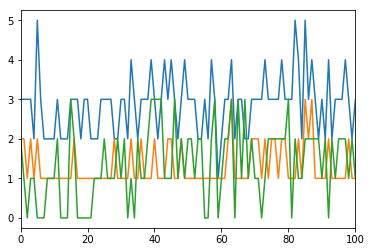

In [135]:
# before normalization
# I narrow the range of xlabel to make it clear to investigate
df['bedrooms'].plot().set_xlim(0, 100), df['bathrooms'].plot().set_xlim(0, 100), df['parking_space'].plot().set_xlim(0, 100)

##### finding...
>After plotting the standardized data below, and observe the range and the center of the distribution for the standardised features. We can see both original and standardized data are in the same shape but shifted.

((0, 100), (0, 100), (0, 100))

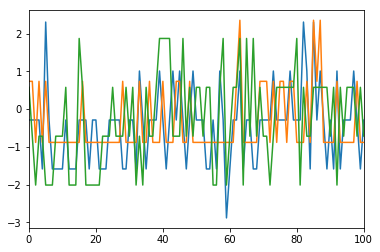

In [136]:
# after normalization
df['bedrooms_scale'].plot().set_xlim(0, 100), df['bathrooms_scale'].plot().set_xlim(0, 100), df['parking_space_scale'].plot().set_xlim(0, 100)

##### take bedrooms as an example
>Both of the results are exactly the same but shifted.

((0, 100), (0, 100))

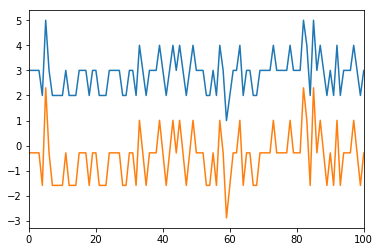

In [137]:
# bedrooms
df['bedrooms'].plot().set_xlim(0, 100), df['bedrooms_scale'].plot().set_xlim(0, 100)

In [138]:
# drop the unused columns
df.drop(['bedrooms_scale', 'bathrooms_scale', 'parking_space_scale'], axis=1, inplace=True)

### 2) Minmax normalization
>In this section, we discuss a different type of normalization for reshaping the range of data, implementing either Scikit-Learn or manually. Max indicates the maximum value of the sample data and min refers to the minimum value of the sample data. There would be one disadvantage of this approach is that when new data is added, it can cause changes in max and min, which need to be redefined.

#### 2.1 Using scikit-learn:

In [139]:
# use scikit-learn linrary
minmax_scale = preprocessing.MinMaxScaler().fit(df[['bedrooms', 'bathrooms', 'parking_space']])
# an array
df_minmax = minmax_scale.transform(df[['bedrooms', 'bathrooms', 'parking_space']])
# check the first 5 data
df_minmax[0:5]

array([[0.5       , 0.5       , 0.66666667],
       [0.5       , 0.5       , 0.33333333],
       [0.5       , 0.        , 0.        ],
       [0.5       , 0.5       , 0.33333333],
       [0.25      , 0.        , 0.33333333]])

#### 2.2 Manually:
>Take bedrooms as an instance. Firstly, find the min and max of "df['bedrooms']".

In [140]:
minA = df['bedrooms'].min()
maxA = df['bedrooms'].max()
minA, maxA

(1, 5)

>Manually apply the min-max normalization to the first value of "df['bedrooms']", 

In [141]:
a = df['bedrooms'][0]
mma = (a - minA) / (maxA - minA)
mma

0.5

>and then compare the manually computed value with the one given by the MinMaxScaler above. (should be the same)

In [142]:
 df_minmax[0][0]

0.5

>The two values mentioned above should be the same. Now, let's look at the normalization of the max value in df['bedrooms']. They are all 1.

In [143]:
a = df[df.bedrooms == df.bedrooms.max()].bedrooms
mma = (a - minA) / (maxA - minA)
mma

5       1.0
82      1.0
85      1.0
174     1.0
182     1.0
213     1.0
218     1.0
268     1.0
287     1.0
372     1.0
379     1.0
433     1.0
455     1.0
461     1.0
463     1.0
465     1.0
509     1.0
515     1.0
526     1.0
533     1.0
541     1.0
630     1.0
662     1.0
688     1.0
765     1.0
772     1.0
774     1.0
776     1.0
791     1.0
816     1.0
       ... 
1459    1.0
1490    1.0
1499    1.0
1517    1.0
1542    1.0
1551    1.0
1552    1.0
1584    1.0
1613    1.0
1628    1.0
1657    1.0
1716    1.0
1727    1.0
1730    1.0
1731    1.0
1735    1.0
1738    1.0
1767    1.0
1788    1.0
1806    1.0
1811    1.0
1813    1.0
1818    1.0
1843    1.0
1851    1.0
1868    1.0
1880    1.0
1886    1.0
1915    1.0
1951    1.0
Name: bedrooms, Length: 101, dtype: float64

In [144]:
print('Min-value after min-max scaling:\nbedrooms = {:.2f}, bathrooms = {:.2f}, parking_space = {:.2f}'
      .format(df_minmax[:,0].min(), df_minmax[:,1].min(), df_minmax[:,2].min()))
print('\nMax-value after min-max scaling:\nbedrooms = {:.2f}, bathrooms = {:.2f}, parking_space = {:.2f}'
      .format(df_minmax[:,0].max(), df_minmax[:,1].max(), df_minmax[:,2].max()))

Min-value after min-max scaling:
bedrooms = 0.00, bathrooms = 0.00, parking_space = 0.00

Max-value after min-max scaling:
bedrooms = 1.00, bathrooms = 1.00, parking_space = 1.00


##### plot
>Now we can see the distribution for three different features as below.

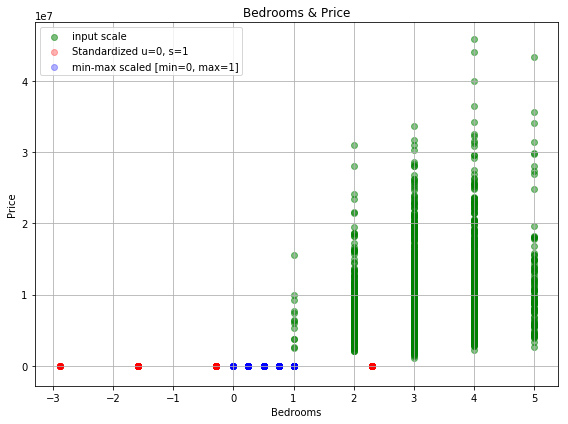

In [145]:
def plot():
    f = plt.figure(figsize=(8,6))

    plt.scatter(df['bedrooms'], df['price'],
            color='green', label='input scale', alpha=0.5)

    plt.scatter(df_std[:,0], df_std[:,1], color='red',
             label='Standardized u=0, s=1', alpha=0.3)
    
    plt.scatter(df_minmax[:,0], df_minmax[:,1],
            color='blue', label='min-max scaled [min=0, max=1]', alpha=0.3)

    plt.title('Bedrooms & Price')
    plt.xlabel('Bedrooms')
    plt.ylabel('Price')
    plt.legend(loc='upper left')
    plt.grid()
    plt.tight_layout()

plot()
plt.show()

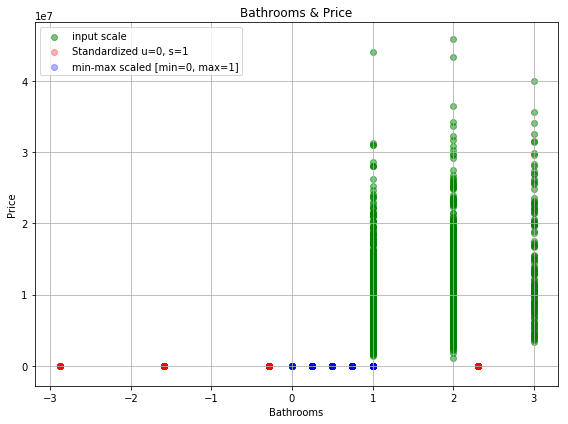

In [146]:
def plot():
    f = plt.figure(figsize=(8,6))

    plt.scatter(df['bathrooms'], df['price'],
            color='green', label='input scale', alpha=0.5)

    plt.scatter(df_std[:,0], df_std[:,1], color='red',
             label='Standardized u=0, s=1', alpha=0.3)
    
    plt.scatter(df_minmax[:,0], df_minmax[:,1],
            color='blue', label='min-max scaled [min=0, max=1]', alpha=0.3)

    plt.title('Bathrooms & Price')
    plt.xlabel('Bathrooms')
    plt.ylabel('Price')
    plt.legend(loc='upper left')
    plt.grid()
    plt.tight_layout()

plot()
plt.show()

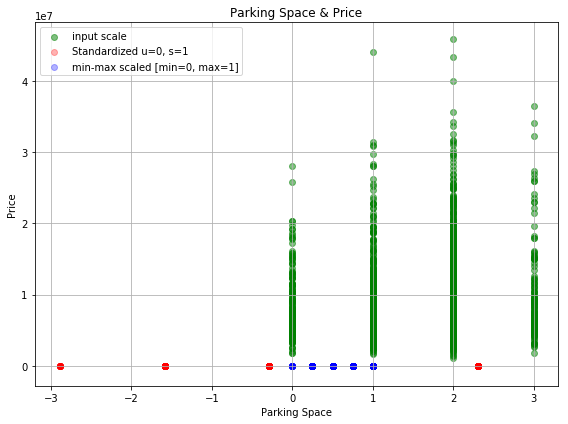

In [147]:
def plot():
    f = plt.figure(figsize=(8,6))

    plt.scatter(df['parking_space'], df['price'],
            color='green', label='input scale', alpha=0.5)
    
    plt.scatter(df_std[:,0], df_std[:,1], color='red',
             label='Standardized u=0, s=1', alpha=0.3)
    
    plt.scatter(df_minmax[:,0], df_minmax[:,1],
            color='blue', label='min-max scaled [min=0, max=1]', alpha=0.3)

    plt.title('Parking Space & Price')
    plt.xlabel('Parking Space')
    plt.ylabel('Price')
    plt.legend(loc='upper left')
    plt.grid()
    plt.tight_layout()

plot()
plt.show()

### Data Transformation
>Before doing data transformation, we can see there is no any relationship between all of the features as below. Besides, the property type is only 'house' so it will be unmeaningful to use it. Consequently, I'll not consider property type in the following sections.

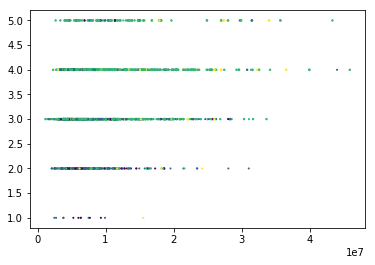

In [149]:
# check the relation (before transformation)
plt.scatter(df.price, df.bedrooms, df.bathrooms, df.parking_space)

### 3) Log transformation
>After doing log transformation, we can find the features price, bedrooms and bathrooms still have no relationship with each other.

In [150]:
# add 4 columns 
df['price_log'] = df.apply(lambda data: math.log(data['price']), axis=1)
df['bed_log'] = df.apply(lambda data: math.log(data['bedrooms']), axis=1)
df['bath_log'] = df.apply(lambda data: math.log(data['bathrooms']), axis=1)
df.head(n=3)

,property_id,lat,lng,addr_street,suburb,price,property_type,year,bedrooms,bathrooms,...,distance_to_train_station,travel_min_to_CBD,transfer_flag,hospital_id,distance_to_hospital,supermarket_id,distance_to_supermaket,price_log,bed_log,bath_log
0,74,-37.823833,144.964249,193/38 Kavanagh Street,SOUTHBANK,13808000,house,2009,3,2,...,660,0,0,hospital_135,818,S_063,698,16.440759,1.098612,0.693147
1,76,-37.829295,144.968233,70 Coventry Street,SOUTHBANK,9200000,house,2015,3,2,...,1228,0,0,hospital_135,671,S_016,965,16.034714,1.098612,0.693147
2,99,-37.809376,144.888260,1 Chapman Street,SEDDON,7080000,house,2006,3,1,...,653,15,0,hospital_056,1817,S_201,1288,15.772784,1.098612,0.000000


##### less than or equal 0
>There are some 0 & None in 'parking_space' column which is mathematically undefined. Thus, Python's log function will raise an exception.

In [151]:
# df['parking_log'] = df.apply(lambda data: math.log(data['parking_space']), axis=1)

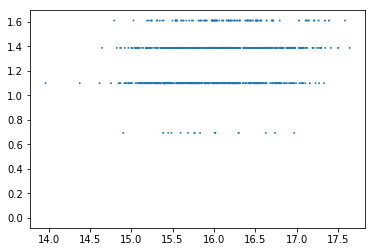

In [152]:
# check the relation (after transformation)
plt.scatter(df.price_log, df.bed_log, df.bath_log) #(, df.parking_log)

### 4) Power transformation
>Power transformation also shows there is no relationship between those features either.

In [153]:
df['price_power'] = df.apply(lambda data: math.pow(data['price'],2), axis=1)
df['bed_power'] = df.apply(lambda data: math.pow(data['bedrooms'],2), axis=1)
df['bath_power'] = df.apply(lambda data: math.pow(data['bathrooms'],2), axis=1)
df['parking_power'] = df.apply(lambda data: math.pow(data['parking_space'],2), axis=1)
df.head(n=3)

,property_id,lat,lng,addr_street,suburb,price,property_type,year,bedrooms,bathrooms,...,distance_to_hospital,supermarket_id,distance_to_supermaket,price_log,bed_log,bath_log,price_power,bed_power,bath_power,parking_power
0,74,-37.823833,144.964249,193/38 Kavanagh Street,SOUTHBANK,13808000,house,2009,3,2,...,818,S_063,698,16.440759,1.098612,0.693147,1.906609e+14,9.0,4.0,4.0
1,76,-37.829295,144.968233,70 Coventry Street,SOUTHBANK,9200000,house,2015,3,2,...,671,S_016,965,16.034714,1.098612,0.693147,8.464000e+13,9.0,4.0,1.0
2,99,-37.809376,144.888260,1 Chapman Street,SEDDON,7080000,house,2006,3,1,...,1817,S_201,1288,15.772784,1.098612,0.000000,5.012640e+13,9.0,1.0,0.0


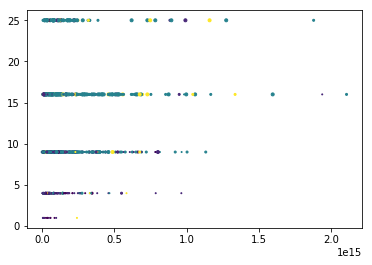

In [154]:
# check the relation (after transformation)
plt.scatter(df.price_power, df.bed_power, df.bath_power, df.parking_power)

### 5) Sqrt transformation
>We cannot find any skew and relation in this part either.

In [155]:
df['price_sqrt'] = df.apply(lambda data: math.sqrt(data['price']), axis=1)
df['bed_sqrt'] = df.apply(lambda data: math.sqrt(data['bedrooms']), axis=1)
df['bath_sqrt'] = df.apply(lambda data: math.sqrt(data['bathrooms']), axis=1)
df['parking_sqrt'] = df.apply(lambda data: math.sqrt(data['parking_space']), axis=1)
df.head(n=3)

,property_id,lat,lng,addr_street,suburb,price,property_type,year,bedrooms,bathrooms,...,bed_log,bath_log,price_power,bed_power,bath_power,parking_power,price_sqrt,bed_sqrt,bath_sqrt,parking_sqrt
0,74,-37.823833,144.964249,193/38 Kavanagh Street,SOUTHBANK,13808000,house,2009,3,2,...,1.098612,0.693147,1.906609e+14,9.0,4.0,4.0,3715.911732,1.732051,1.414214,1.414214
1,76,-37.829295,144.968233,70 Coventry Street,SOUTHBANK,9200000,house,2015,3,2,...,1.098612,0.693147,8.464000e+13,9.0,4.0,1.0,3033.150178,1.732051,1.414214,1.000000
2,99,-37.809376,144.888260,1 Chapman Street,SEDDON,7080000,house,2006,3,1,...,1.098612,0.000000,5.012640e+13,9.0,1.0,0.0,2660.826939,1.732051,1.000000,0.000000


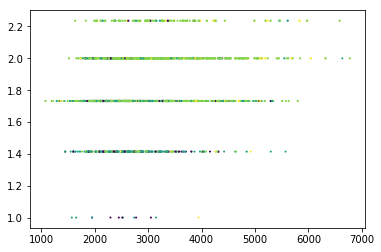

In [156]:
# check the relation (after transformation)
plt.scatter(df.price_sqrt, df.bed_sqrt, df.bath_sqrt, df.parking_sqrt)

##### prediction
>In general, the higher the R-squared, the better the model fits your data. After trying different permutations, I find R-squared which is the percentage of the response variable variation that is explained by a linear model is always low. That is to say, all of the features I test have little relationship with the house price.

In [157]:
X = df.loc[:, ['bed_power', 'bath_power', 'parking_sqrt']].values
y = df.loc[:, ['price']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
model = LinearRegression()
model.fit(X_train, y_train)
print('Score: {}'.format(model.score(X_test, y_test)))

Score: 0.08880972728862802


In [158]:
# drop the unsed columns
df.drop(['price_log', 'bed_log', 'bath_log', 'price_power', 'bed_power', 'bath_power', 'parking_power', 'price_sqrt', 'bed_sqrt', 'bath_sqrt', 'parking_sqrt'], axis=1, inplace=True)

### Conclusion
>In order to carry out the prediction, we should remove outliers to build the regression model. The fewer outliers in the model, the more accurate the prediction will be. In my perspective, after investigating different transformation methods, I think the log and sqrt transformation will work better than the others. This is because they can narrow the value of property price. Then, it could reduce the total outliers to make the prediction much more precise.<br>

>Moreover, we can find the distribution of values in the log and sqrt transformation is much more symmetrical than the others. In other words, the regression models of these two can predict the better result. However, scatters in the power transformation plot are distributed in a certain area which means the outcome of prediction won't be 100% accurate.